In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('DataSources/CC-3Y-Transactions.xlsx')
data.columns = data.columns.str.lstrip()
data.tail(10)

,City,Date,Card Type,Exp Type,Gender,Amount
26042,"Hyderabad, India",2015-01-15,Silver,Travel,M,194550
26043,"Hyderabad, India",2015-05-15,Silver,Travel,F,280335
26044,"Kolkata, India",2014-10-14,Gold,Travel,M,243249
26045,"Kolkata, India",2014-02-26,Signature,Travel,F,170049
26046,"Hyderabad, India",2013-10-09,Signature,Travel,M,198903
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019
26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174
26051,"Hyderabad, India",2013-10-19,Signature,Bills,M,184410


# Report 1

In [3]:
data1 = data
data2 = data
data3 = data 

data1['Year'] = pd.DatetimeIndex(data1['Date']).year
data2['Year'] = pd.DatetimeIndex(data2['Date']).year
data3['Year'] = pd.DatetimeIndex(data3['Date']).year

data1 = data1.loc[data1['Year']==2013]
data2 = data2.loc[data2['Year']==2014]
data3 = data3.loc[data3['Year']==2015]

data1 = data1.groupby(['City', 'Year']).sum('Amount').sort_values('Amount', ascending = False)
data2 = data2.groupby(['City', 'Year']).sum('Amount').sort_values('Amount', ascending = False)
data3 = data3.groupby(['City', 'Year']).sum('Amount').sort_values('Amount', ascending = False)

In [4]:
report1 = data1.head(5)
report1 = report1.reset_index()
report1 = report1[["Year", "City", "Amount"]]
report1 = pd.pivot_table(report1, index='Year', columns = 'City')
report1.columns = report1.columns.droplevel()
report1 = report1[["Bengaluru, India", "Greater Mumbai, India", "Ahmedabad, India", "Delhi, India", "Kanpur, India"]]
report1

City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Kanpur, India"
Year,,,,,
2013,84999287,84735652,83291837,82126961,19640338


In [5]:
report1_2 = data2.head(5)
report1_2 = report1_2.reset_index()
report1_2 = report1_2[["Year", "City", "Amount"]]
report1_2 = pd.pivot_table(report1_2, index='Year', columns = 'City')
report1_2.columns = report1_2.columns.droplevel()
report1_2 = report1_2[["Bengaluru, India", "Greater Mumbai, India", "Ahmedabad, India", "Delhi, India", "Hyderabad, India"]]
report1_2

City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Hyderabad, India"
Year,,,,,
2014,351482095,349709415,348289187,329591186,71066005


In [6]:
report1_3 = data3.head(5)
report1_3 = report1_3.reset_index()
report1_3 = report1_3[["Year", "City", "Amount"]]
report1_3 = pd.pivot_table(report1_3, index='Year', columns = 'City')
report1_3.columns = report1_3.columns.droplevel()
report1_3 = report1_3[["Delhi, India", "Greater Mumbai, India", "Ahmedabad, India", "Bengaluru, India", "Kolkata, India"]]
report1_3

City,"Delhi, India","Greater Mumbai, India","Ahmedabad, India","Bengaluru, India","Kolkata, India"
Year,,,,,
2015,145211065,142306409,136213286,135845357,30918731


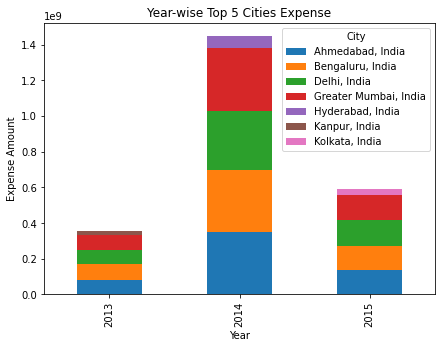

In [7]:
full_report1 = pd.concat([report1,report1_2, report1_3], axis=0)
full_report1 = full_report1.unstack()
full_report1 = pd.DataFrame(full_report1)
full_report1 = full_report1.reset_index()
full_report1.rename(columns = {0:'Amount'}, inplace = True)
plt.rcParams["figure.figsize"] = (7, 5)
full_report1.pivot(index='Year', columns='City', values='Amount').plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Expense Amount')
plt.title('Year-wise Top 5 Cities Expense')
plt.show()

# Report 2

In [8]:
data4 = data
data5 = data
data6 = data

data4['Quarter'] = pd.DatetimeIndex(data4['Date']).quarter
data5['Quarter'] = pd.DatetimeIndex(data5['Date']).quarter
data6['Quarter'] = pd.DatetimeIndex(data6['Date']).quarter

data4['Year'] = pd.DatetimeIndex(data4['Date']).year
data5['Year'] = pd.DatetimeIndex(data5['Date']).year
data6['Year'] = pd.DatetimeIndex(data6['Date']).year

data4 = data4.loc[data4['Year']==2013]
data5 = data5.loc[data5['Year']==2014]
data6 = data6.loc[data6['Year']==2015]

data4 = data4.groupby(['Year', 'Gender', 'Quarter'])['Amount'].sum()
data5 = data5.groupby(['Year', 'Gender', 'Quarter'])['Amount'].sum()
data6 = data6.groupby(['Year', 'Gender', 'Quarter'])['Amount'].sum()

report2 = data4
report2_2 = data5
report2_3 = data6

In [9]:
report2.unstack()

Quarter              4
Year Gender           
2013 F       333421908
     M       280221976

In [10]:
report2_2.unstack()

Quarter              1          2          3          4
Year Gender                                            
2014 F       318768288  331421060  335382914  334689993
     M       281336181  269947023  290613061  292555513

In [11]:
report2_3.unstack()

Quarter              1          2
Year Gender                      
2015 F       344993188  206633679
     M       279678969  175169620

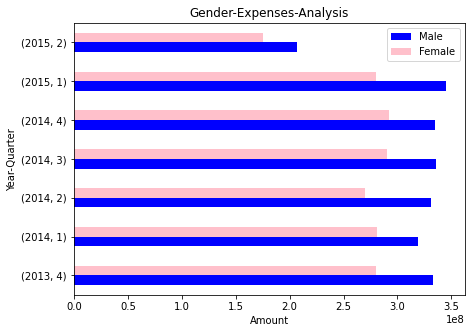

In [12]:
full_report2 = pd.concat([report2,report2_2,report2_3], axis=0)
full_report2 = full_report2.reset_index()
#print(full_report2)

plt.rcParams["figure.figsize"] = (7, 5)
full_report2.pivot(index=['Year', 'Quarter'], columns= 'Gender').plot(kind='barh', color=['blue','pink']).legend(['Male','Female'])
plt.xlabel('Amount')
plt.ylabel('Year-Quarter')
plt.title('Gender-Expenses-Analysis')
plt.show()

# Report 3

In [13]:
data7 = data
data8 = data
data9 = data 

data7['Year'] = pd.DatetimeIndex(data7['Date']).year
data8['Year'] = pd.DatetimeIndex(data8['Date']).year
data9['Year'] = pd.DatetimeIndex(data9['Date']).year

data7 = data7.loc[data7['Year']==2013]
data8 = data8.loc[data8['Year']==2014]
data9 = data9.loc[data9['Year']==2015]

data7 = data7.groupby(['Exp Type', 'Year']).sum('Amount').sort_values('Amount', ascending = True)
data8 = data8.groupby(['Exp Type', 'Year']).sum('Amount').sort_values('Amount', ascending = True)
data9 = data9.groupby(['Exp Type', 'Year']).sum('Amount').sort_values('Amount', ascending = True)

In [14]:
report3 = data7.head(3)
report3 = report3.reset_index()
report3 = report3[["Year", "Exp Type", "Amount"]]
report_3 = pd.pivot_table(report3, index='Year', columns = 'Exp Type')
report_3.columns = report_3.columns.droplevel()
report_3

Exp Type,Entertainment,Grocery,Travel
Year,,,
2013,113094669,111806890,15353606


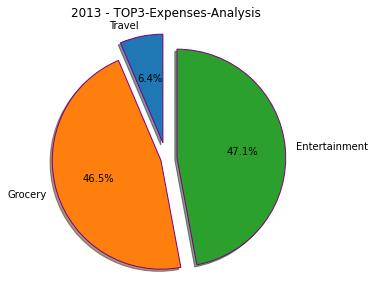

In [15]:
plt.subplots(figsize =(7, 5))
explode = (0.15, 0.05, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "purple" }
plt.pie(report3['Amount'], labels = report3['Exp Type'],shadow = True, explode = explode, startangle = 90, wedgeprops = wp, autopct='%.1f%%')
plt.title('2013 - TOP3-Expenses-Analysis')
plt.show()

In [16]:
report3_2 = data8.head(3)
report3_2 = report3_2.reset_index()
report3_2 = report3_2[["Year", "Exp Type", "Amount"]]
report_3_2 = pd.pivot_table(report3_2, index='Year', columns = 'Exp Type')
report_3_2.columns = report_3_2.columns.droplevel()
report_3_2

Exp Type,Entertainment,Grocery,Travel
Year,,,
2014,443730570,428628961,65532848


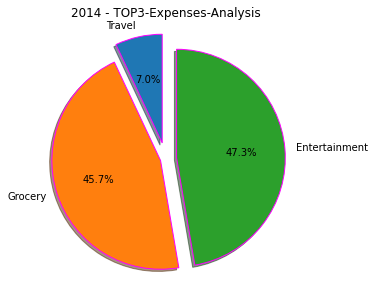

In [17]:
plt.subplots(figsize =(7, 5))
explode = (0.15, 0.05, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "magenta" }
plt.pie(report3_2['Amount'], labels = report3_2['Exp Type'],shadow = True, explode = explode, startangle = 90, wedgeprops = wp, autopct='%.1f%%')
plt.title('2014 - TOP3-Expenses-Analysis')
plt.show()

In [18]:
report3_3 = data9.head(3)
report3_3 = report3_3.reset_index()
report3_3 = report3_3[["Year", "Exp Type", "Amount"]]
report_3_3 = pd.pivot_table(report3_3, index='Year', columns = 'Exp Type')
report_3_3.columns = report_3_3.columns.droplevel()
report_3_3

Exp Type,Entertainment,Grocery,Travel
Year,,,
2015,169612297,177772072,28369157


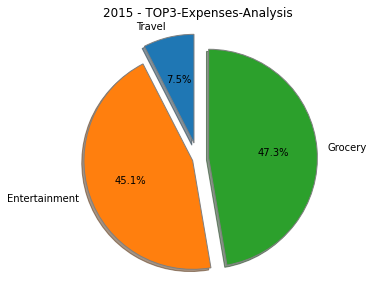

In [19]:
plt.subplots(figsize =(7, 5))
explode = (0.15, 0.05, 0.1)
wp = {'linewidth' : 1, 'edgecolor' : "grey" }
plt.pie(report3_3['Amount'], labels = report3_3['Exp Type'],shadow = True, explode = explode, startangle = 90, wedgeprops = wp, autopct='%.1f%%')
plt.title('2015 - TOP3-Expenses-Analysis')
plt.show()

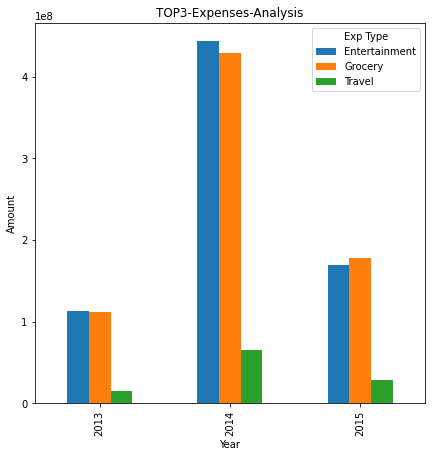

In [20]:
full_report3 = pd.concat([report_3,report_3_2, report_3_3], axis=0)
#print(full_report3)

plt.rcParams["figure.figsize"] = (7, 7)
full_report3.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('TOP3-Expenses-Analysis')
plt.show()